## Project Title - Online Payment Fraud Detection for BB Plc

   - Blossom Bank, also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK.
   - Problem Definition: To build a Machine Learning model for Blossom Bank to predict online payment fraud, which will boost customers' confidence in the Bank, increase profitability and also assist the Bank guide against online fraud risks.


In [237]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Inspection

In [238]:
# load the data
data = pd.read_csv('Online Payment Fraud Detection.csv', index_col=False)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [239]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [241]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [242]:
data.shape

(1048575, 10)

## Data Cleansing

- Handling missing values (NaN)
- Replacing text
- Removing or deleting unnecessary records

In [243]:
#data cleasning cells
# Check for missing figures
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

## Exploratory Data Analysis

- Visualize relationships between the label and some key features 
- Explore correlations 
- Conduct univariate and multivariate analysis as much as is feasible 

      


### Univariate Analysis

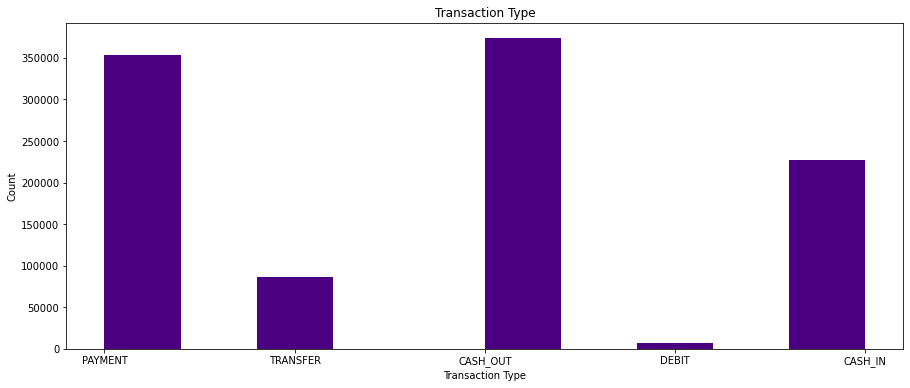

In [244]:
fig, ax = plt.subplots(figsize=[15,6])

plt.hist(data.type, color='indigo')
plt.title("Transaction Type")
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

#### The above chart shows that the highest Transaction Type was performed through 'Cash-Out', followed by 'Payment'

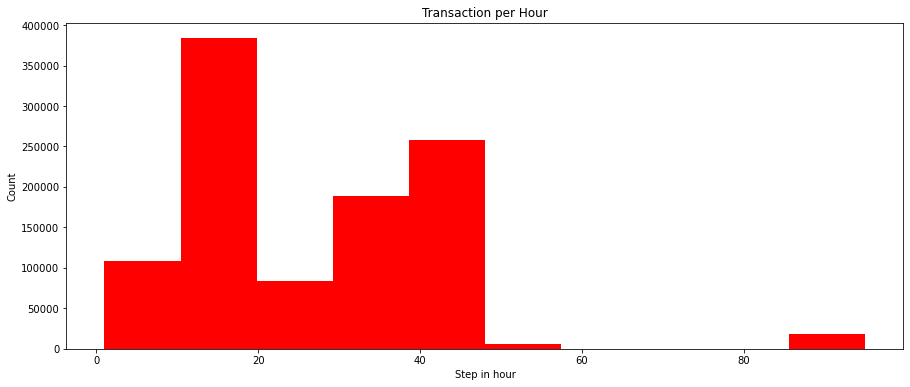

In [245]:
fig, ax = plt.subplots(figsize=[15,6])

plt.hist(data.step, color='red')
plt.title("Transaction per Hour")
plt.xlabel('Step in hour')
plt.ylabel('Count')
plt.show()

#### The above chart shows that nearly 39000 customers spent between 10 hrs - 20 hrs performing transactions with Blossom Bank

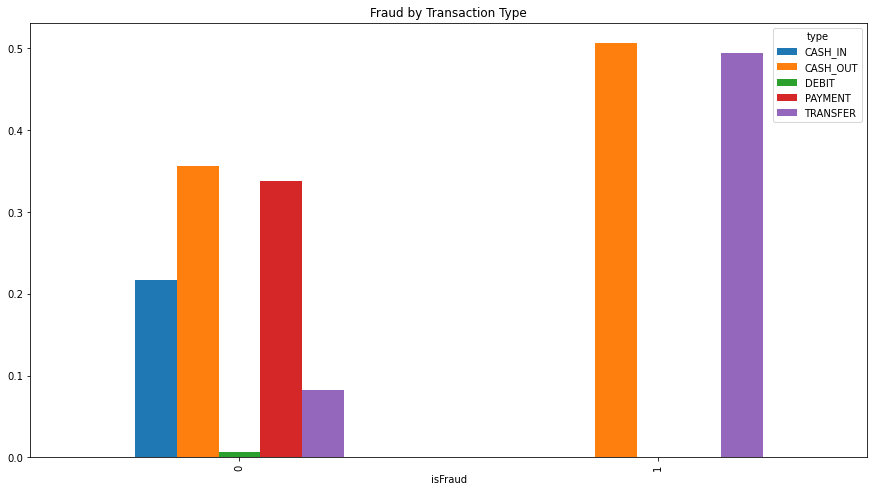

In [246]:
#create pivot of job and marital
marital_pivot = pd.crosstab(data.isFraud,data.type,normalize='index')

#plot the data
marital_pivot.plot.bar(figsize=(15,8))

plt.title('Fraud by Transaction Type')
plt.show()


#### From the chart above, 'Transfer' and 'Cash Out' are the highest transaction type that are more proned to Fraud

### Multivariate Analysis

<AxesSubplot:xlabel='amount', ylabel='oldbalanceOrg'>

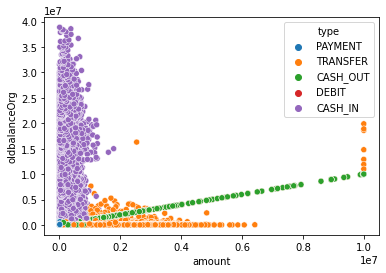

In [247]:
sns.scatterplot(data=data, x="amount", y="oldbalanceOrg", hue="type")

#### From the above chart, taking the balance before transaction into consideration, customers with transaction amount between N0 and N1,000,000 performed more 'Cash-In' transactions, while there is also an increasing trend among customers that performed 'Cash Out' transaction.


<AxesSubplot:xlabel='amount', ylabel='newbalanceOrig'>

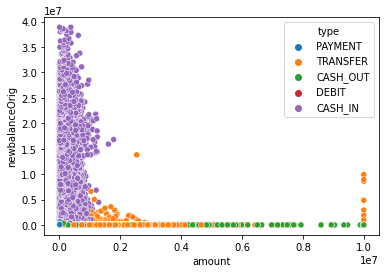

In [248]:
sns.scatterplot(data=data, x="amount", y="newbalanceOrig", hue="type")


#### From the above chart, taking the balance after transaction into consideration, customers with transaction amount between N0 and N1,000,000 performed more 'Cash-In' transactions, while few customers performed transactions through 'Transfer'

<AxesSubplot:xlabel='amount', ylabel='oldbalanceDest'>

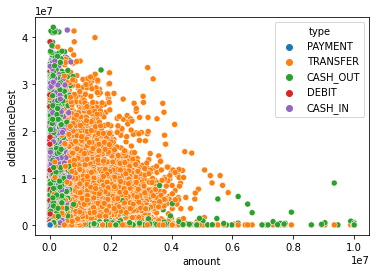

In [249]:
sns.scatterplot(data=data, x="amount", y="oldbalanceDest", hue="type")

#### From the above chart, taking the 'Initial balance of the recipient before transaction' into consideration, most of the inflow into recipients' accounts came through 'Transfer'

<AxesSubplot:xlabel='amount', ylabel='newbalanceDest'>

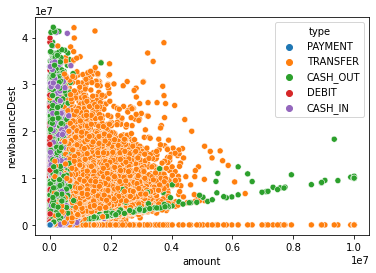

In [250]:
sns.scatterplot(data=data, x="amount", y="newbalanceDest", hue="type")


#### From the above chart, taking the 'new balance of the recipient after transaction' into consideration, a high volume of inflow into recipients' accounts came through 'Transfer', while there is also an increasing trend for 'Cash Out' transactions

## Feature Engineering
- Normally we do not need to use all the columns in our data frame to predict our target. Feature selection is where you choose the features that you will use to train your model.

In [251]:
# Select columns with only integers (numeric columns) and remove columns that contain object
feature_columns = data.select_dtypes(exclude=object)
feature_columns
feature_columns.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [252]:
feature_columns.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [253]:
#multivariate analysis cells
#Convert categorical data into numerical using One-Hot Encoding
categorical = ["type"]
categorical

['type']

In [254]:
categories_dummies = pd.get_dummies(data[categorical])

categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [255]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both data and categories_dummies as a list of their names

Data1 = pd.concat([data, categories_dummies], axis=1)

#check what you have done
print(Data1.shape)
Data1.head()

(1048575, 15)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [256]:
#remove the initial categorical columns now that we have encoded them
#use the list called categorical to delete all the initially selected columns at once

Data2 =Data1.drop(categorical,axis=1)

Data2

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0,1,0,0,0
1048571,95,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0,0,0,1,0
1048572,95,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0,0,0,1,0
1048573,95,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0,0,0,1,0


## Model selection, training, and validation

### Select Target

In [257]:
y = Data2.isFraud

In [258]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [259]:
# We are dropping string columns and 'isFraud', since isFraud is our target
features =Data2.drop(["isFraud", "nameOrig", "nameDest" ],axis=1)
features.shape

(1048575, 11)

In [260]:
X = Data2[features.columns]

## Train Test Split

In [261]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import seaborn as sns

In [262]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

## Import ML algorithms and Initialize them

### Random Forest Classifier

In [263]:
from sklearn.ensemble import RandomForestClassifier

In [264]:
RF_model =  RandomForestClassifier(random_state=30)

In [265]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [266]:
RF_preds = RF_model.predict(X_test)

In [267]:
print(accuracy_score(RF_preds, y_test))

0.9997639653815893


In [268]:
print(classification_report(RF_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419062
           1       0.80      0.98      0.88       368

    accuracy                           1.00    419430
   macro avg       0.90      0.99      0.94    419430
weighted avg       1.00      1.00      1.00    419430



### KNeighbors

In [269]:
from sklearn.neighbors import KNeighborsClassifier

In [270]:
K_model = KNeighborsClassifier()

In [271]:
K_model.fit(X_train,y_train)

KNeighborsClassifier()

In [272]:
K_preds = K_model.predict(X_test)

In [273]:
from sklearn.metrics import classification_report

In [274]:
print(accuracy_score(K_preds, y_test))

0.9993729585389696


In [275]:
print(classification_report(K_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419126
           1       0.55      0.81      0.65       304

    accuracy                           1.00    419430
   macro avg       0.77      0.90      0.83    419430
weighted avg       1.00      1.00      1.00    419430



### Naive Bayes Classifier

In [276]:
from sklearn.naive_bayes import GaussianNB

In [277]:
NB_model = GaussianNB()

In [278]:
NB_model.fit(X_train,y_train)

GaussianNB()

In [279]:
NB_preds = NB_model.predict(X_test)

In [280]:
from sklearn.metrics import classification_report

In [281]:
print(accuracy_score(NB_preds, y_test))

0.9861717092244237


In [282]:
print(classification_report(NB_preds, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    413833
           1       0.27      0.02      0.04      5597

    accuracy                           0.99    419430
   macro avg       0.63      0.51      0.52    419430
weighted avg       0.98      0.99      0.98    419430



### Decision Tree Classifier

In [283]:
from sklearn.tree import DecisionTreeClassifier

In [284]:
DT_model = DecisionTreeClassifier(random_state=30)

In [285]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=30)

In [286]:
DT_preds = DT_model.predict(X_test)

In [287]:
print(accuracy_score(DT_preds, y_test))

0.9995517726438261


In [288]:
print(classification_report(DT_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418959
           1       0.82      0.78      0.80       471

    accuracy                           1.00    419430
   macro avg       0.91      0.89      0.90    419430
weighted avg       1.00      1.00      1.00    419430



##  Confusion Matrix 

In [289]:
from sklearn.metrics import confusion_matrix

### Generate confusion matrix for Random Forest Classifier

In [290]:
cf_matrix = confusion_matrix(y_test, RF_preds)

print(cf_matrix)

[[418972      9]
 [    90    359]]


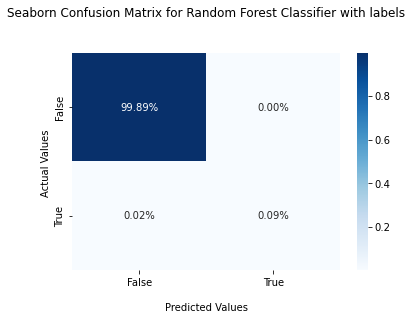

In [291]:
# Generating confusion Matrix with percentages
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix for Random Forest Classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Generate confusion matrix for KNeighborsClassifier

In [292]:
cf_matrix = confusion_matrix(y_test, K_preds)

print(cf_matrix)

[[418922     59]
 [   204    245]]


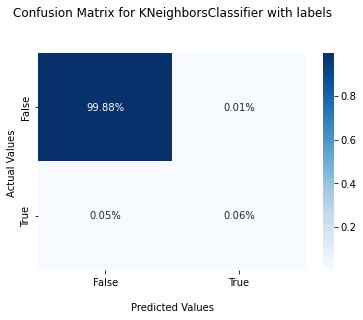

In [293]:
# Generating confusion Matrix with percentages
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for KNeighborsClassifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Generate confusion matrix for Naive Bayes Classifier

In [294]:
cf_matrix = confusion_matrix(y_test, NB_preds)

print(cf_matrix)

[[413507   5474]
 [   326    123]]


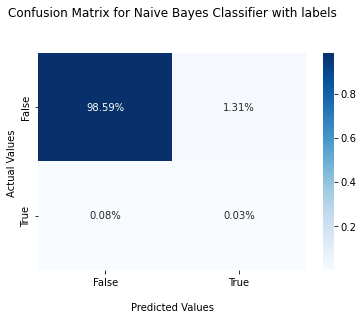

In [295]:
# Generating confusion Matrix with percentages
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Naive Bayes Classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Generate confusion matrix for DecisionTreeClassifier

In [296]:
cf_matrix = confusion_matrix(y_test, DT_preds)

print(cf_matrix)

[[418876    105]
 [    83    366]]


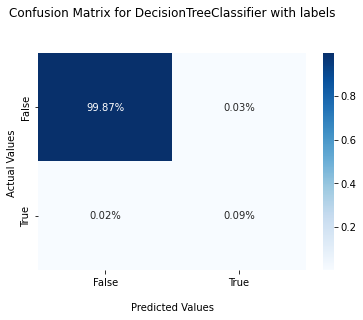

In [297]:
# Generating confusion Matrix with percentages
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for DecisionTreeClassifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Random Forest Classifier showed the highest accuracy and precision, compared with other machine learning algorithms. Also, Confusion Matrices were optimal for Random Forest Classifier, hence could be construed as the most robust model for predicting online payment fraud for BB Plc.